## Сравнительный анализ тарифных планов «Смарт» и «Ультра» на небольшой выборке клиентов на основании данных за 2018 год, для возможной последующей корректировки рекламного бюджета.

## Оглавление

## [Описание наборов данных](#step1)

## [Подготовка данных](#step2)

* #### [Таблица users (информация о пользователях)](#step3)

* #### [Таблица calls (информация о звонках)](#step4)

* #### [Таблица messages (информация о сообщениях)](#step5)

* #### [Таблица internet (информация об интернет-сессиях)](#step6)

* #### [Таблица tariffs (информация о тарифах)](#step7)

## [ Работа с данными](#step8)

* #### [Количество сделанных звонков и израсходованных минут разговора по месяцам](#step9)

* #### [Количество отправленных сообщений по месяцам](#step10)

* #### [Объем израсходованного интернет-трафика по месяцам](#step11)

* #### [Помесячная выручка с каждого пользователя](#step12)

## [Сравнительный анализ данных по тарифам](#step13)

* #### [Оплата в месяц](#step14)

* #### [Количество израсходованных минут в месяц](#step15)

* #### [Количество израсходованных сообщений в месяц](#step16)

* #### [Количество израсходованных Гб интернета в месяц](#step17)

## [Проверка гипотез](#step18)

* #### [Гипотеза №1](#step19)

* #### [Гипотеза №2](#step20)

## [Общий вывод по проделанной работе](#step21)

### Описание наборов данных.<a name="step1"></a>
Получение данных<br> Импорт библиотек

### Описание тарифов<br>
#### Тариф «Смарт»<br>
* Ежемесячная плата: 550 рублей<br>
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>

#### Стоимость услуг сверх тарифного пакета:<br>
* минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)<br>
* сообщение: 3 рубля<br>
* 1 Гб интернет-трафика: 200 рублей<br>

#### Тариф «Ультра»<br>
* Ежемесячная плата: 1950 рублей<br>
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>

#### Стоимость услуг сверх тарифного пакета:<br> 
* минута разговора: 1 рубль<br>
* сообщение: 1 рубль<br>
* 1 Гб интернет-трафика: 150 рублей<br>

### Описание таблиц<br>
#### Таблица users (информация о пользователях):<br>
* user_id — уникальный идентификатор пользователя<br>
* first_name — имя пользователя<br>
* last_name — фамилия пользователя<br>
* age — возраст пользователя (годы)<br>
* reg_date — дата подключения тарифа (день, месяц, год)<br>
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
* city — город проживания пользователя<br>
* tarif — название тарифного плана<br>

#### Таблица calls (информация о звонках):<br>
* id — уникальный номер звонка<br>
* call_date — дата звонка<br>
* duration — длительность звонка в минутах<br>
* user_id — идентификатор пользователя, сделавшего звонок<br>

#### Таблица messages (информация о сообщениях):<br>
* id — уникальный номер сообщения<br>
* message_date — дата сообщения<br>
* user_id — идентификатор пользователя, отправившего сообщение<br>

#### Таблица internet (информация об интернет-сессиях):<br>
* id — уникальный номер сессии<br>
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
* session_date — дата интернет-сессии<br>
* user_id — идентификатор пользователя<br>

#### Таблица tariffs (информация о тарифах):<br>
* tariff_name — название тарифа<br>
* rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
* messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)<br>
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

In [3]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [4]:
# Загрузим датасеты
users = pd.read_csv('./datasets/users.csv')
calls = pd.read_csv('./datasets/calls.csv')
messages = pd.read_csv('./datasets/messages.csv')
internet = pd.read_csv('./datasets/internet.csv', index_col=0)
tariffs = pd.read_csv('./datasets/tariffs.csv')

## Подготовка данных.<a name="step2"></a>
Приведение данных к нужным типам <br>
Нахождение и исправление ошибок в данных.

Рассмотрим каждую из таблиц отдельно:

#### Таблица users (информация о пользователях)<a name="step3"></a>

In [5]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Первое,на что стоит обратить внимание: даты в стоблце с датами регистрации записаны не в том формате, 38 человек прекратили пользоваться услугами связи.

Переведем даты в правильный формат datetime64:

In [8]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Таблица calls (информация о звонках):<a name="step4"></a>

In [10]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Переведем даты в формат datetime64:

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Так как, из условия задания, «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Округлим длительность звонков до целого значения.

In [15]:
#Используем ceil(), тк это округление до ближайшего большего числа
calls['duration']= calls['duration'].apply(np.ceil).astype('int')

In [16]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [17]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Нулевая длительность может означать либо, что звонок был либо сброшен, либо пропущен

In [18]:
calls['duration'].value_counts()

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

Таких звонков 39613, слишком большое значение для того, что бы удалять эти строки. <br> С другой стороны, если принять во внимание, что мы округлили до большего значения, и «Мегалайн» всегда округляет значения минут вверх, то строки с нулевой длительностью разговора действительно просто 0, и в них не содержаться даже секунды и милисекунды.<br> Следовательно, минуты не расходовались вообще.<br>  Но, еще одна позиция, возможно, эти люди покупали сим карту только для интернета, а не для звонков. Поэтому, удалять строки пока не будем. Посмотрим, как это повлияет на дальнейший анализ.

#### Таблица messages (информация о сообщениях):<a name="step5"></a>

In [19]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [20]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Даты снова не в порядке

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

Пожалуй, переведем еще столбец с id в int

In [23]:
messages['id'] = messages['id'].astype('int')

In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


Готово

#### Таблица internet (информация об интернет-сессиях):<a name="step6"></a>

In [25]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [26]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [27]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [28]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [29]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [30]:
internet['id'] = internet['id'].astype('int')

In [31]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Как и в случае с нулевыми минутами, не будем пока удалять строки с нулевым интернетом. Возможно, некоторые люди не пользуются им вообще, однако пользуются остальными услугами тарифа.

#### Таблица tariffs (информация о тарифах):<a name="step7"></a>

In [32]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [33]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [34]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Все кажется вполне нормальным, данные целочисленные, ничего переводить не надо.

<font color='green'>Данные загружены и изучены. Используются верные методы для получения общей информации о таблице. Успешно найдены имеющиеся проблемы, а даты приведены к правильному формату.

## Работа с данными<a name="step8"></a>

Посчет для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя

#### Количество сделанных звонков и израсходованных минут разговора по месяцам<a name="step9"></a>

Вычленим из столбца с датой месяц и добавим отдельным столбцом в таблицу

In [35]:
calls['month'] = calls['call_date'].dt.month_name()

In [36]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


Сгруппируем длительность звонков по месяцам

In [37]:
calls_in_month = calls.groupby(['month','user_id']).agg({'duration':'sum', 'id':'count'}).reset_index()

In [38]:
calls_in_month.head()

,month,user_id,duration,id
0,April,1005,712,101
1,April,1006,356,47
2,April,1007,198,25
3,April,1009,324,39
4,April,1011,371,62


Перименуем столбцы для наглядности

In [39]:
calls_in_month.columns = ['month','user_id', 'minutes_in_month', 'calls_in_month']

In [40]:
calls_in_month.head()

,month,user_id,minutes_in_month,calls_in_month
0,April,1005,712,101
1,April,1006,356,47
2,April,1007,198,25
3,April,1009,324,39
4,April,1011,371,62


#### Количество отправленных сообщений по месяцам<a name="step10"></a>

Проделываем те же операции, что и с предыдущим столбцом. Вычленяем месяц и группируем количество сообщений по месяцам.

In [41]:
messages['month'] = messages['message_date'].dt.month_name()

In [42]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,June
1,10001,2018-10-08,1000,October
2,10002,2018-08-04,1000,August
3,10003,2018-06-16,1000,June
4,10004,2018-12-05,1000,December


In [43]:
messages_in_month = messages.groupby(['month','user_id']).agg({'id':'count'}).reset_index()

In [44]:
messages_in_month.head()

,month,user_id,id
0,April,1005,41
1,April,1007,11
2,April,1009,14
3,April,1011,7
4,April,1012,21


In [45]:
messages_in_month.columns = ['month','user_id', 'messages_in_month']

In [46]:
messages_in_month.head()

,month,user_id,messages_in_month
0,April,1005,41
1,April,1007,11
2,April,1009,14
3,April,1011,7
4,April,1012,21


#### Объем израсходованного интернет-трафика по месяцам<a name="step11"></a>

In [47]:
internet['month'] = internet['session_date'].dt.month_name()

In [48]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,November
1,10001,1052.81,2018-09-07,1000,September
2,10002,1197.26,2018-06-25,1000,June
3,10003,550.27,2018-08-22,1000,August
4,10004,302.56,2018-09-24,1000,September


In [49]:
internet_in_month = internet.groupby(['month','user_id']).agg({'mb_used':'sum'}).reset_index()

In [50]:
internet_in_month.head()

,month,user_id,mb_used
0,April,1005,9351.72
1,April,1006,13936.70
2,April,1007,8022.76
3,April,1009,14709.22
4,April,1011,18076.35


In [51]:
internet_in_month.columns = ['month','user_id', 'mb_in_month']

In [52]:
internet_in_month.head()

,month,user_id,mb_in_month
0,April,1005,9351.72
1,April,1006,13936.70
2,April,1007,8022.76
3,April,1009,14709.22
4,April,1011,18076.35


#### Помесячная выручка с каждого пользователя<a name="step12"></a>

Объединим таблицы в одну

In [53]:
calls_and_massages = calls_in_month.merge(messages_in_month ,on= ['month','user_id'], how = 'outer')

In [54]:
calls_and_massages.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month
0,April,1005,712.0,101.0,41.0
1,April,1006,356.0,47.0,NaN
2,April,1007,198.0,25.0,11.0
3,April,1009,324.0,39.0,14.0
4,April,1011,371.0,62.0,7.0


In [55]:
calls_and_massages_and_internet = calls_and_massages.merge(internet_in_month, on= ['month','user_id'], how = 'outer')

In [56]:
calls_and_massages_and_internet.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,mb_in_month
0,April,1005,712.0,101.0,41.0,9351.72
1,April,1006,356.0,47.0,NaN,13936.70
2,April,1007,198.0,25.0,11.0,8022.76
3,April,1009,324.0,39.0,14.0,14709.22
4,April,1011,371.0,62.0,7.0,18076.35


Не хватает тарифного плана

In [57]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Столбец с названием тарифа отличается от тех, что в других таблицах. Меняем

In [58]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [59]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [60]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [61]:
users = users[['user_id','age','churn_date','city','reg_date','tariff']]
users.head()

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaT,Краснодар,2018-05-25,ultra
1,1001,41,NaT,Москва,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,2018-06-17,smart
3,1003,23,NaT,Москва,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,2018-05-14,ultra


In [62]:
users_calls_and_massages_and_internet = calls_and_massages_and_internet.merge(users, on = 'user_id', how = 'outer')

In [63]:
users_calls_and_massages_and_internet.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,mb_in_month,age,churn_date,city,reg_date,tariff
0,April,1005,712.0,101.0,41.0,9351.72,67,NaT,Набережные Челны,2018-01-25,smart
1,August,1005,619.0,71.0,64.0,7543.63,67,NaT,Набережные Челны,2018-01-25,smart
2,December,1005,592.0,84.0,54.0,8668.19,67,NaT,Набережные Челны,2018-01-25,smart
3,February,1005,456.0,69.0,38.0,7383.93,67,NaT,Набережные Челны,2018-01-25,smart
4,January,1005,95.0,15.0,7.0,2727.97,67,NaT,Набережные Челны,2018-01-25,smart


In [64]:
common_info = users_calls_and_massages_and_internet.merge(tariffs, on= 'tariff', how = 'outer')

In [65]:
common_info.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,mb_in_month,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,April,1005,712.0,101.0,41.0,9351.72,67,NaT,Набережные Челны,2018-01-25,smart,50,15360,500,550,200,3,3
1,August,1005,619.0,71.0,64.0,7543.63,67,NaT,Набережные Челны,2018-01-25,smart,50,15360,500,550,200,3,3
2,December,1005,592.0,84.0,54.0,8668.19,67,NaT,Набережные Челны,2018-01-25,smart,50,15360,500,550,200,3,3
3,February,1005,456.0,69.0,38.0,7383.93,67,NaT,Набережные Челны,2018-01-25,smart,50,15360,500,550,200,3,3
4,January,1005,95.0,15.0,7.0,2727.97,67,NaT,Набережные Челны,2018-01-25,smart,50,15360,500,550,200,3,3


In [66]:
common_info.isna().sum()

month                       2
user_id                     0
minutes_in_month           42
calls_in_month             42
messages_in_month         499
mb_in_month                13
age                         0
churn_date               3027
city                        0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Очень много пропусков в столбце с сообщениями. Осмелюсь предположить, что это потому, что писать сообщения вышло из моды, сейчас все пользуются соц сетями или звонят. Исходя из этого, заменяем пропуски на нули.

In [67]:
common_info['messages_in_month'] = common_info['messages_in_month'].fillna(0)

Так же поступаем с пропусками в остальных столбцах, делая ставку на то, что люди могу не пользоваться интернетом или пользоваться только им, без звонков.

In [68]:
common_info['minutes_in_month'] = common_info['minutes_in_month'].fillna(0)

In [69]:
common_info['calls_in_month'] = common_info['calls_in_month'].fillna(0)

In [70]:
common_info['mb_in_month'] = common_info['mb_in_month'].fillna(0)

In [71]:
common_info['month'] = common_info['month'].fillna(0)

In [72]:
common_info.isna().sum()

month                       0
user_id                     0
minutes_in_month            0
calls_in_month              0
messages_in_month           0
mb_in_month                 0
age                         0
churn_date               3027
city                        0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Почему то вылезло 2 пропуска в столбце с названием месяца. Это очень странно, возможно, это моя ошибка при обработке данных.

In [73]:
common_info.duplicated().sum()

0

Дубликатов нет

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

Для начала, переведем мегабайты в гигабайты, потмоу цена в тарифе указана за Гб

In [74]:
common_info['mb_in_month'] = common_info['mb_in_month']  / 1024

In [75]:
common_info['mb_per_month_included'] = common_info['mb_per_month_included']  / 1024

In [76]:
common_info = common_info.rename(columns={'mb_in_month': 'gb_in_month','mb_per_month_included': 'gb_per_month_included'})

In [77]:
common_info['gb_in_month']= common_info['gb_in_month'].apply(np.ceil).astype('int')

In [78]:
common_info.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,smart,50,15.0,500,550,200,3,3
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,smart,50,15.0,500,550,200,3,3
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,smart,50,15.0,500,550,200,3,3
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,smart,50,15.0,500,550,200,3,3
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,smart,50,15.0,500,550,200,3,3


In [79]:
common_info['minutes_overrun']  = common_info['minutes_in_month'] - common_info['minutes_included']
common_info['messages_overrun'] = common_info['messages_in_month'] - common_info['messages_included']
common_info['gb_used_overrun']  = common_info['gb_in_month'] - common_info['gb_per_month_included'] 

In [80]:
common_info.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,50,15.0,500,550,200,3,3,212.0,-9.0,-5.0
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,50,15.0,500,550,200,3,3,119.0,14.0,-7.0
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,50,15.0,500,550,200,3,3,92.0,4.0,-6.0
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,50,15.0,500,550,200,3,3,-44.0,-12.0,-7.0
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,50,15.0,500,550,200,3,3,-405.0,-43.0,-12.0


In [81]:
def payment_overrun(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_gb = 0
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute']
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['gb_used_overrun'] > 0:
        revenue_gb = row['gb_used_overrun'] * row['rub_per_gb']
    return revenue_by_min + revenue_by_messages + revenue_gb

In [82]:
common_info['payment_overrun'] = common_info.apply(payment_overrun, axis=1)

In [83]:
common_info['total_payment'] = common_info['payment_overrun'] + common_info['rub_monthly_fee']

Рассмотрим затраты по месяцам

In [84]:
table_per_month = common_info.groupby(['month']).agg({'total_payment':'sum','minutes_in_month':'sum', 'messages_in_month':'sum', 'gb_in_month':'sum'})
table_per_month.sort_values(by='total_payment', ascending=False)

,total_payment,minutes_in_month,messages_in_month,gb_in_month
month,,,,
December,829265.0,243675.0,20555.0,9156
November,704753.0,210089.0,18244.0,8026
October,655367.0,193928.0,17114.0,7431
September,557786.0,173475.0,14759.0,6475
August,533240.0,153698.0,13088.0,6030
July,438764.0,131746.0,11320.0,5057
June,368759.0,105180.0,8983.0,4207
May,306849.0,88810.0,7298.0,3541
April,217966.0,66310.0,5179.0,2459


Исходя из таблицы выше, больше всего денег люди тратят в декабре. Если честно, не знаю, чем это может быть обусловлено. Как вариант, подготовка к новому году, уточнение планов, созвон с гостями, что то вроде того.

## Сравнительный анализ данных по тарифам<a name="step13"></a>

Рассмотрим подробнее каждый из тарифов. <br>Проанализируем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.<br> Посчитаем среднее количество, дисперсию и стандартное отклонение. <br> Построем гистограммы. <br> Опишем распределения.

##### Тариф «Ультра»<br>
* Ежемесячная плата: 1950 рублей<br>
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
* Стоимость услуг сверх тарифного пакета:<br>
* Минута разговора: 1 рубль<br>
* Сообщение: 1 рубль<br>
* 1 Гб интернет-трафика: 150 рублей<br>

In [85]:
ultra = common_info.query('tariff == "ultra"')

In [86]:
ultra.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment
2230,April,1018,636.0,85.0,34.0,6,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2364.0,-966.0,-24.0,0.0,1950.0
2231,August,1018,929.0,115.0,20.0,9,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2071.0,-980.0,-21.0,0.0,1950.0
2232,December,1018,839.0,110.0,37.0,6,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2161.0,-963.0,-24.0,0.0,1950.0
2233,July,1018,760.0,105.0,25.0,7,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2240.0,-975.0,-23.0,0.0,1950.0
2234,June,1018,679.0,96.0,24.0,12,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2321.0,-976.0,-18.0,0.0,1950.0


##### Тариф «Смарт»<br>
* Ежемесячная плата: 550 рублей<br>
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
* Стоимость услуг сверх тарифного пакета:<br>
* Минута разговора: 3 рубля<br>
* Сообщение: 3 рубля<br>
* 1 Гб интернет-трафика: 200 рублей<br>

In [87]:
smart = common_info.query('tariff == "smart"')

In [88]:
smart.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,212.0,-9.0,-5.0,636.0,1186.0
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,119.0,14.0,-7.0,399.0,949.0
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,92.0,4.0,-6.0,288.0,838.0
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,-44.0,-12.0,-7.0,0.0,550.0
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,-405.0,-43.0,-12.0,0.0,550.0


In [89]:
def histogramma (df, column, color, alpha):
    df[column].hist(bins=10,figsize=(10,10),color=color, alpha = alpha).set_xlabel(column, fontsize=12)
    df[column].hist(bins=10,figsize=(10,10),color=color, alpha = alpha).set_ylabel('number_of_payments', fontsize=12)

#### Оплата в месяц<a name="step14"></a>

Text(0.5, 1.0, 'ULTRA: total payment in month')

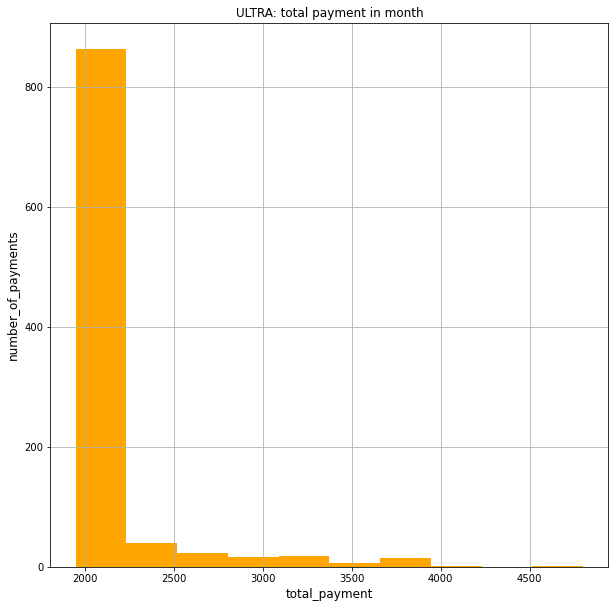

In [90]:
histogramma(ultra, 'total_payment', 'orange', 1)
plt.title('ULTRA: total payment in month')

Text(0.5, 1.0, 'SMART: total payment in month')

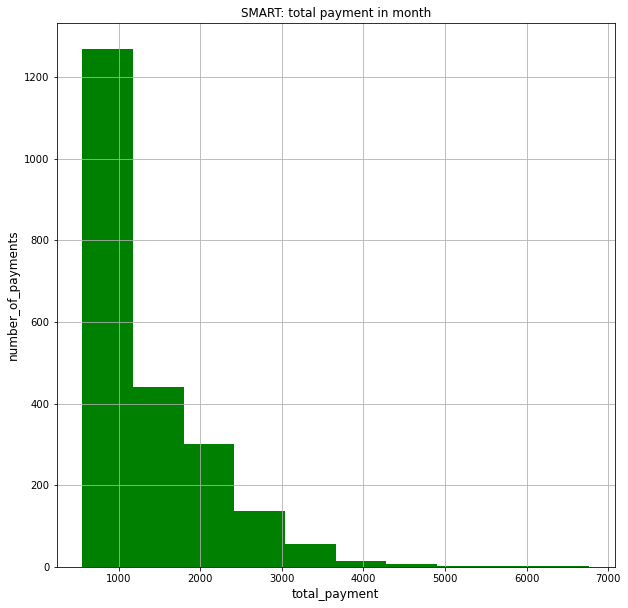

In [91]:
histogramma(smart, 'total_payment', 'green', 1)
plt.title('SMART: total payment in month')

Text(0.5, 1.0, 'ULTRA and SMART: total payment in month')

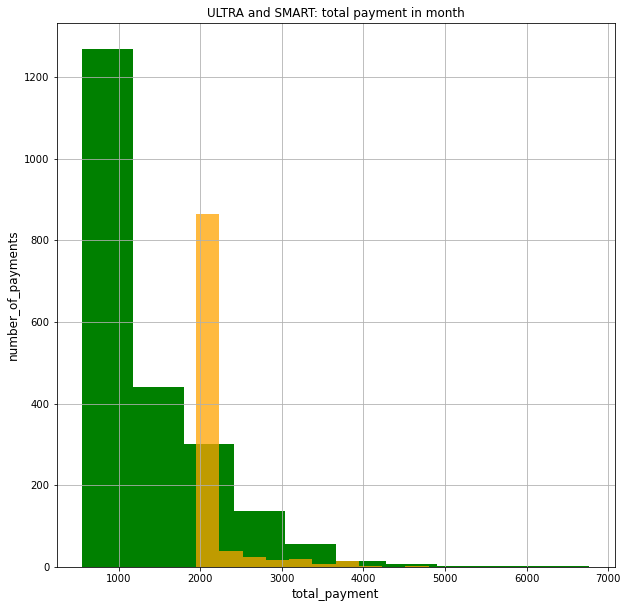

In [92]:
histogramma(smart, 'total_payment', 'green', 1)
histogramma(ultra, 'total_payment', 'orange', 0.5)
plt.title('ULTRA and SMART: total payment in month')

Исходя из графиков, можно сделать вывод, что люди, использующие тариф Smart очень часто переплачивают. Тариф стоит 550 рублей, и мало кто укладывается в рамки услуг, предоставленных этим тарифным планом. <br> В тарифе Ultra дела обстоят получше, люди, использующие его, переплачивают не так часто, следовательно, пакета, который предоставляет тариф, им достаточно.

In [93]:
common_info.groupby('tariff').agg({'total_payment':['median','mean','var','std']}).round(2)

total_payment                            
              median     mean        var     std
tariff                                          
smart         1021.0  1289.64  669730.76  818.37
ultra         1950.0  2070.03  141387.71  376.02

Рассмотрим, как обстоят дела с минутами, сообщениями и интернетом

#### Количество израсходованных минут в месяц<a name="step15"></a>

Text(0.5, 1.0, 'ULTRA: minutes in month')

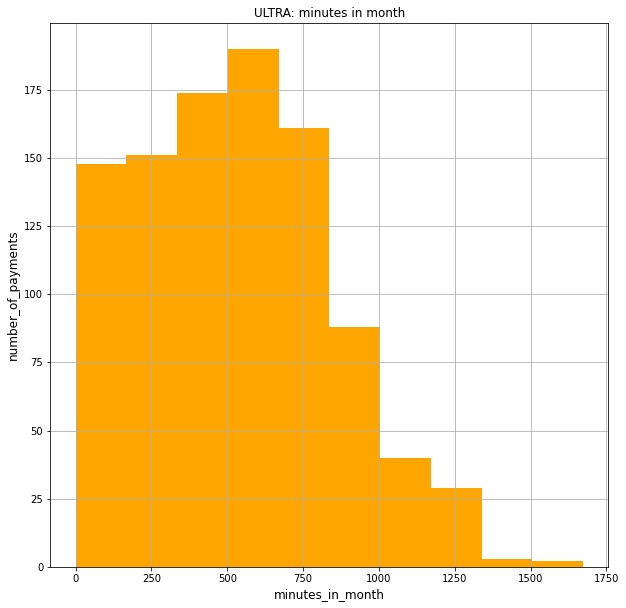

In [94]:
histogramma(ultra, 'minutes_in_month', 'orange', 1)
plt.title('ULTRA: minutes in month')

Text(0.5, 1.0, 'SMART: minutes in month')

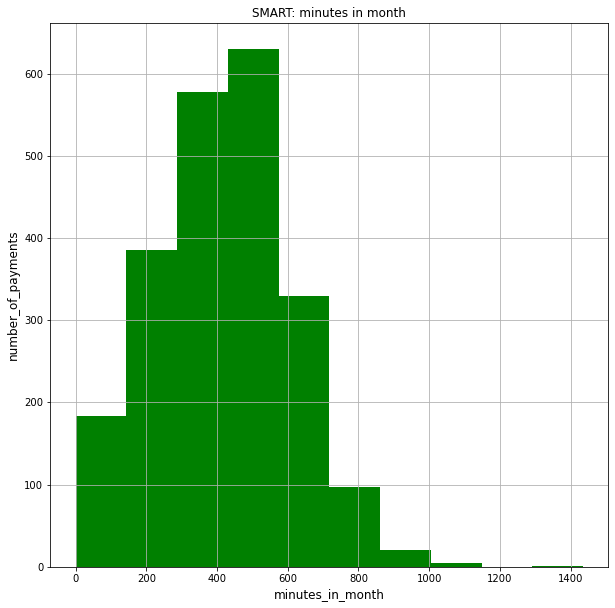

In [95]:
histogramma(smart, 'minutes_in_month', 'green', 1)
plt.title('SMART: minutes in month')

Text(0.5, 1.0, 'ULTRA and SMART: minutes in month')

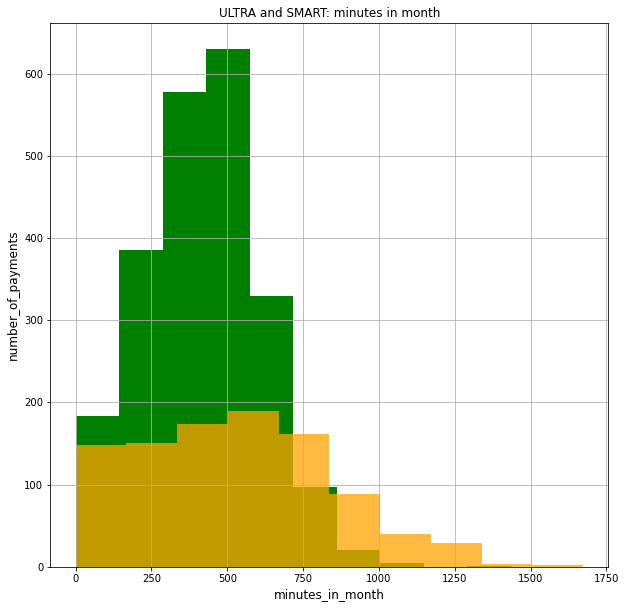

In [96]:
histogramma(smart, 'minutes_in_month', 'green', 1)
histogramma(ultra, 'minutes_in_month', 'orange', 0.5)
plt.title('ULTRA and SMART: minutes in month')

In [97]:
common_info.groupby('tariff').agg({'minutes_in_month':['median','mean','var','std']}).round(2)

minutes_in_month                           
                 median    mean        var     std
tariff                                            
smart             421.5  417.75   36281.39  190.48
ultra             518.0  526.09  101052.49  317.89

Люди, выбирающие тариф Smart чаще всего тратят все минуты, включенные в тариф, а бывает и больше.<br> Люди, выбирающие Ultra имеют в запасе еще кучу неиспользованных минут.

#### Количество израсходованных сообщений в месяц<a name="step16"></a>

Text(0.5, 1.0, 'ULTRA: messages in month')

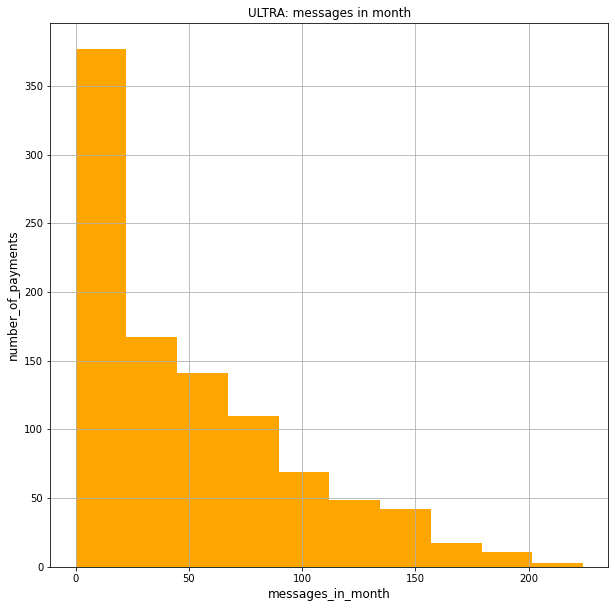

In [98]:
histogramma(ultra, 'messages_in_month', 'orange',1)
plt.title('ULTRA: messages in month')

Text(0.5, 1.0, 'SMART: messages in month')

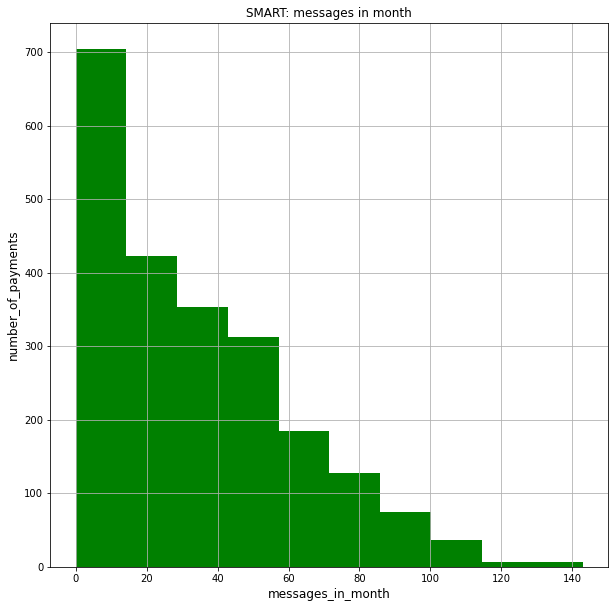

In [99]:
histogramma(smart, 'messages_in_month', 'green',1)
plt.title('SMART: messages in month')

Text(0.5, 1.0, 'ULTRA and SMART: messages in month')

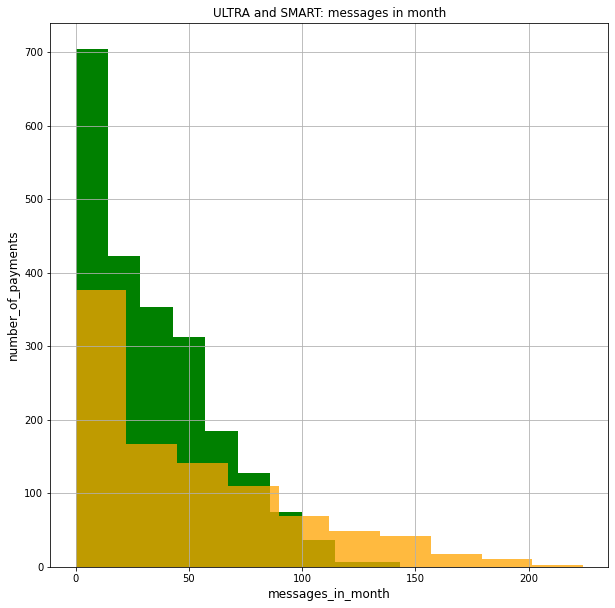

In [100]:
histogramma(smart, 'messages_in_month', 'green',1)
histogramma(ultra, 'messages_in_month', 'orange',0.5)
plt.title('ULTRA and SMART: messages in month')

In [101]:
common_info.groupby('tariff').agg({'messages_in_month':['median','mean','var','std']}).round(2)

messages_in_month                       
                  median   mean      var    std
tariff                                         
smart               28.0  33.37   796.96  28.23
ultra               38.0  49.31  2285.42  47.81

Что в одном тарифе, что в другом, количество сообщений не так уж часто выходят за рамки тарифа. В тарифе Ultra так вообще их остается еще куча неспользованных. Видимо, сообщения действительно вышли из моды, и их мало кто использует сейчас.

#### Количество израсходованных Гб интернета в месяц<a name="step17"></a>

Text(0.5, 1.0, 'ULTRA: internet in month')

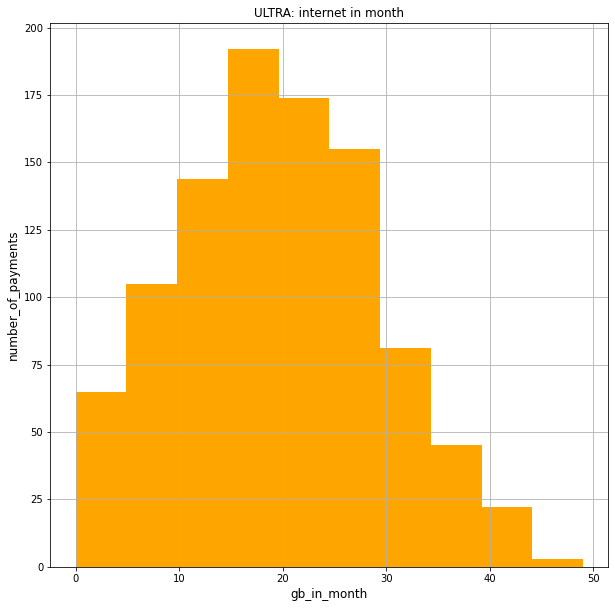

In [102]:
histogramma(ultra, 'gb_in_month', 'orange',1)
plt.title('ULTRA: internet in month')

Text(0.5, 1.0, 'SMART: internet in month')

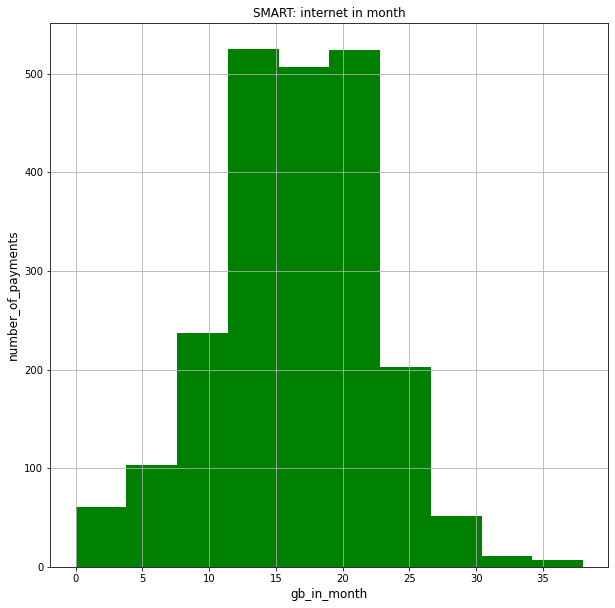

In [103]:
histogramma(smart, 'gb_in_month', 'green',1)
plt.title('SMART: internet in month')

Text(0.5, 1.0, 'ULTRA and SMART: internet in month')

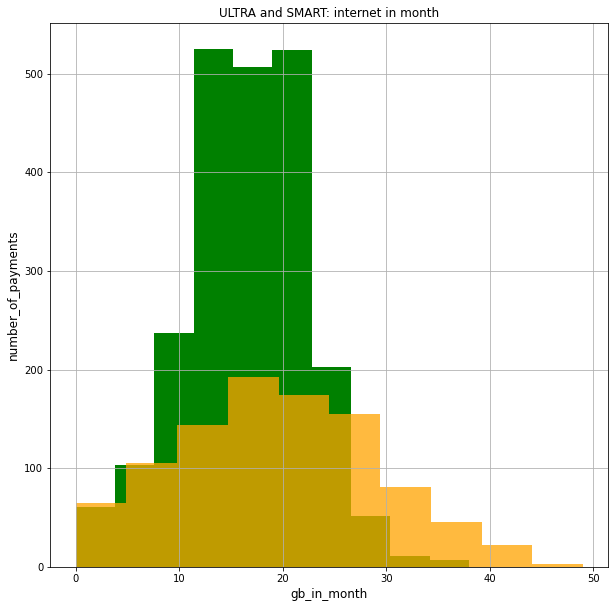

In [104]:
histogramma(smart, 'gb_in_month', 'green',1)
histogramma(ultra, 'gb_in_month', 'orange',0.5)
plt.title('ULTRA and SMART: internet in month')

In [105]:
common_info.groupby('tariff').agg({'gb_in_month':['median','mean','var','std']}).round(2)

gb_in_month                    
            median   mean    var   std
tariff                                
smart           17  16.32  33.13  5.76
ultra           19  19.47  97.38  9.87

В принципе, манера использования интеренета у пользователей обоих тарифов похожа. В среднем, количество использованых Гб в месяц примерно одинаковое.<br> Люди, у которых тариф Ultra, используют больше трафика, но это и логично, ведь они могут себе это позволить

Выделим группу людей, которые в течение года переплачивают по тарифу. Посмотрим, сколько их,в зависимости от тарифа

In [106]:
def overrun(row):
    if row['payment_overrun'] > 0:
        return 'Переплачивает'
    else:
        return 'Не переплачивает'

In [107]:
common_info['status'] = common_info.apply(overrun, axis=1)

In [108]:
common_info.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment,status
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,212.0,-9.0,-5.0,636.0,1186.0,Переплачивает
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,119.0,14.0,-7.0,399.0,949.0,Переплачивает
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,92.0,4.0,-6.0,288.0,838.0,Переплачивает
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-44.0,-12.0,-7.0,0.0,550.0,Не переплачивает
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-405.0,-43.0,-12.0,0.0,550.0,Не переплачивает


In [109]:
common_info.groupby(['status', 'tariff']).agg({'user_id':'count'})

user_id
status           tariff         
Не переплачивает smart       568
                 ultra       852
Переплачивает    smart      1662
                 ultra       134

С тарифом Smart переплачивает большее количество людей.

## Этап 5. Проверка гипотез<a name="step18"></a>

Проверим следующие гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Гипотеза №1. <a name="step19"></a>

Нулевая гипотеза  H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается<br>
Альтернативная гипотеза H₁:  средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var). equal_var=False, тк дисперсия не равна.<br> 
Критический уровень статистической значимости принемаем как 0.05

In [110]:
ultra.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment
2230,April,1018,636.0,85.0,34.0,6,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2364.0,-966.0,-24.0,0.0,1950.0
2231,August,1018,929.0,115.0,20.0,9,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2071.0,-980.0,-21.0,0.0,1950.0
2232,December,1018,839.0,110.0,37.0,6,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2161.0,-963.0,-24.0,0.0,1950.0
2233,July,1018,760.0,105.0,25.0,7,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2240.0,-975.0,-23.0,0.0,1950.0
2234,June,1018,679.0,96.0,24.0,12,71,NaT,Уфа,2018-04-01,...,3000,1950,150,1,1,-2321.0,-976.0,-18.0,0.0,1950.0


In [111]:
smart.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,212.0,-9.0,-5.0,636.0,1186.0
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,119.0,14.0,-7.0,399.0,949.0
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,92.0,4.0,-6.0,288.0,838.0
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,-44.0,-12.0,-7.0,0.0,550.0
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,500,550,200,3,3,-405.0,-43.0,-12.0,0.0,550.0


In [112]:
smart_payment = smart['total_payment']

In [113]:
ultra_payment = ultra['total_payment']

In [114]:
alpha = 0.05   
results = st.ttest_ind(ultra_payment, smart_payment)  
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Гипотеза о равентстве выручек не подтвердилась. Следовательно, выручки не равны. Посмотрим, какая из выручек больше и насколько

In [115]:
common_info

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment,status
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,212.0,-9.0,-5.0,636.0,1186.0,Переплачивает
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,119.0,14.0,-7.0,399.0,949.0,Переплачивает
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,92.0,4.0,-6.0,288.0,838.0,Переплачивает
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-44.0,-12.0,-7.0,0.0,550.0,Не переплачивает
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-405.0,-43.0,-12.0,0.0,550.0,Не переплачивает
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,September,1473,0.0,0.0,19.0,17,18,NaT,Красноярск,2018-08-05,...,1950,150,1,1,-3000.0,-981.0,-13.0,0.0,1950.0,Не переплачивает
3212,December,1328,0.0,0.0,7.0,39,44,NaT,Мурманск,2018-10-16,...,1950,150,1,1,-3000.0,-993.0,9.0,1350.0,3300.0,Переплачивает
3213,November,1328,0.0,0.0,8.0,35,44,NaT,Мурманск,2018-10-16,...,1950,150,1,1,-3000.0,-992.0,5.0,750.0,2700.0,Переплачивает
3214,October,1328,0.0,0.0,6.0,22,44,NaT,Мурманск,2018-10-16,...,1950,150,1,1,-3000.0,-994.0,-8.0,0.0,1950.0,Не переплачивает


In [116]:
common_info.groupby('tariff').agg({'total_payment':'sum', 'user_id':'count'})

,total_payment,user_id
tariff,,
smart,2875901.0,2230
ultra,2041050.0,986


In [117]:
payment_difference = smart_payment.sum() - ultra_payment.sum()
payment_difference

834851.0

Очевидно, что тариф Smart приносит мобильному оператору больше дохода, чем тариф Ultra, не смотря на то, что у последнего абоненская плата больше. Возможно это обусловлено тем, что большинство людей, стремясь сэкономить, выбирают тариф Smart, но при этом частенько переплачивают, потому что выходят за рамки тарифного плана. Причем возраст никак не влияет на выбор тарифа.

### Гипотеза №2. <a name="step20"></a>

Нулевая гипотеза  H₀: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов <br>
Альтернативная гипотеза H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [118]:
common_info.head()

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment,status
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,212.0,-9.0,-5.0,636.0,1186.0,Переплачивает
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,119.0,14.0,-7.0,399.0,949.0,Переплачивает
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,92.0,4.0,-6.0,288.0,838.0,Переплачивает
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-44.0,-12.0,-7.0,0.0,550.0,Не переплачивает
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-405.0,-43.0,-12.0,0.0,550.0,Не переплачивает


In [119]:
common_info['city'].unique()

array(['Набережные Челны', 'Ульяновск', 'Москва', 'Пермь', 'Самара',
       'Санкт-Петербург', 'Челябинск', 'Уфа', 'Петрозаводск', 'Тюмень',
       'Улан-Удэ', 'Омск', 'Казань', 'Иркутск', 'Курск', 'Якутск', 'Сочи',
       'Волгоград', 'Чита', 'Краснодар', 'Красноярск', 'Архангельск',
       'Новосибирск', 'Ставрополь', 'Новокузнецк', 'Магнитогорск',
       'Вологда', 'Тамбов', 'Киров', 'Нижний Новгород', 'Ростов-на-Дону',
       'Смоленск', 'Балашиха', 'Хабаровск', 'Новороссийск', 'Пенза',
       'Махачкала', 'Орёл', 'Калининград', 'Астрахань', 'Подольск',
       'Томск', 'Саратов', 'Ижевск', 'Саранск', 'Ярославль',
       'Стерлитамак', 'Чебоксары', 'Рязань', 'Тула', 'Химки', 'Белгород',
       'Екатеринбург', 'Мурманск', 'Волжский', 'Владивосток',
       'Севастополь', 'Калуга', 'Воронеж', 'Тверь', 'Череповец',
       'Владимир', 'Нижний Тагил', 'Грозный', 'Тольятти', 'Липецк',
       'Кострома', 'Владикавказ', 'Курган', 'Барнаул', 'Кемерово',
       'Оренбург', 'Брянск', 'Сургут', 

In [120]:
Moscow = common_info.query('city == "Москва"')
Moscow

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment,status
23,April,1007,198.0,25.0,11.0,8,65,NaT,Москва,2018-04-19,...,550,200,3,3,-302.0,-39.0,-7.0,0.0,550.0,Не переплачивает
24,August,1007,458.0,74.0,27.0,21,65,NaT,Москва,2018-04-19,...,550,200,3,3,-42.0,-23.0,6.0,1200.0,1750.0,Переплачивает
25,December,1007,421.0,72.0,26.0,13,65,NaT,Москва,2018-04-19,...,550,200,3,3,-79.0,-24.0,-2.0,0.0,550.0,Не переплачивает
26,July,1007,577.0,69.0,26.0,16,65,NaT,Москва,2018-04-19,...,550,200,3,3,77.0,-24.0,1.0,431.0,981.0,Переплачивает
27,June,1007,545.0,68.0,26.0,14,65,NaT,Москва,2018-04-19,...,550,200,3,3,45.0,-24.0,-1.0,135.0,685.0,Переплачивает
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,December,1461,821.0,109.0,76.0,25,53,NaT,Москва,2018-11-21,...,1950,150,1,1,-2179.0,-924.0,-5.0,0.0,1950.0,Не переплачивает
3169,November,1461,246.0,33.0,24.0,10,53,NaT,Москва,2018-11-21,...,1950,150,1,1,-2754.0,-976.0,-20.0,0.0,1950.0,Не переплачивает
3179,November,1367,266.0,37.0,0.0,11,43,2018-11-16,Москва,2018-09-14,...,1950,150,1,1,-2734.0,-1000.0,-19.0,0.0,1950.0,Не переплачивает
3180,October,1367,558.0,76.0,0.0,23,43,2018-11-16,Москва,2018-09-14,...,1950,150,1,1,-2442.0,-1000.0,-7.0,0.0,1950.0,Не переплачивает


In [121]:
Not_Moscow = common_info.query('city != "Москва"')
Not_Moscow 

,month,user_id,minutes_in_month,calls_in_month,messages_in_month,gb_in_month,age,churn_date,city,reg_date,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,gb_used_overrun,payment_overrun,total_payment,status
0,April,1005,712.0,101.0,41.0,10,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,212.0,-9.0,-5.0,636.0,1186.0,Переплачивает
1,August,1005,619.0,71.0,64.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,119.0,14.0,-7.0,399.0,949.0,Переплачивает
2,December,1005,592.0,84.0,54.0,9,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,92.0,4.0,-6.0,288.0,838.0,Переплачивает
3,February,1005,456.0,69.0,38.0,8,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-44.0,-12.0,-7.0,0.0,550.0,Не переплачивает
4,January,1005,95.0,15.0,7.0,3,67,NaT,Набережные Челны,2018-01-25,...,550,200,3,3,-405.0,-43.0,-12.0,0.0,550.0,Не переплачивает
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,September,1473,0.0,0.0,19.0,17,18,NaT,Красноярск,2018-08-05,...,1950,150,1,1,-3000.0,-981.0,-13.0,0.0,1950.0,Не переплачивает
3212,December,1328,0.0,0.0,7.0,39,44,NaT,Мурманск,2018-10-16,...,1950,150,1,1,-3000.0,-993.0,9.0,1350.0,3300.0,Переплачивает
3213,November,1328,0.0,0.0,8.0,35,44,NaT,Мурманск,2018-10-16,...,1950,150,1,1,-3000.0,-992.0,5.0,750.0,2700.0,Переплачивает
3214,October,1328,0.0,0.0,6.0,22,44,NaT,Мурманск,2018-10-16,...,1950,150,1,1,-3000.0,-994.0,-8.0,0.0,1950.0,Не переплачивает


In [122]:
Moscow_payment = Moscow['total_payment']

In [123]:
Not_Moscow_payment = Not_Moscow['total_payment']

In [124]:
alpha = 0.05   
results = st.ttest_ind(Moscow_payment, Not_Moscow_payment)  
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Гипотеза о том, что средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов не подтвердилась. Значимых различий между тем, в Москве находится абонент или в другом регионе, нет.

## Общий вывод по проделанной работе <a name="step21"></a>

На основании произведенного анализа можно сделать вывод о том, что сообщениями уже почти никто не пользуется. В тарифе Smart люди используют пакет по максимуму, а в тарифе Ultra остается много неизрасходованных миут и Гб. Как вариант, можно было бы предложить компании сделать что то вроде кеш бека за остатки по тарифу, либо предоставить пользователям возможность обменивать смс на минуты, Гб и т.д. В этом случае выгода от покупки тарифа Ultra будет очевидна, а люди со Smart, возможно, перестанут переплачивать. <br>
Затраты в Москве и за ее пределами примерно одинаковы, значит использование сотовой связи не зависит от того, Москва это или другой регион.

Я не могу однозначно ответить на вопрос: какой же тариф более перспективный? Выбор тарифного плана-вещь индивидуальная.<br> Большинство людей, стремясь сэкономить, выбирают тариф Smart, но при этом частенько переплачивают, потому что выходят за рамки тарифного плана. Это выгодно для компании, но, не выгодно пользователям. Это, в свою очередь, может быть опасно для компании, потому что может привести к оттоку пользователей из-за переплат.<br> Я бы предложила руководству компании рассмотреть вариант не только с кеш беком для обонентов Ultra, но и варианты для людей со Smart.<br> Например, предложить группе "переплатчиков" тариф Ultra со скидкой или чуть более выгодными условиями, выдавая это за "условия для доверенных пользователей". Людям это позволит чувствовать выгоду от того, что более дорогой тариф они оплачивают дешевле, а компании, не потерять не деньги, не клиентов. 